In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,precision_score,roc_auc_score

In [2]:
data = pd.DataFrame(pd.read_csv('netflix_titles.csv'))

In [3]:
data.shape

(8807, 12)

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
null_values = data.isnull().sum().sort_values(ascending = False)
total_values = len(data)
percentage_of_null = (null_values/total_values)*100
percentage_of_null_df = pd.DataFrame({'Column Name': percentage_of_null.index,
                                      'Null Percentage': percentage_of_null.values})
percentage_of_null_df.reset_index(drop = True,inplace = True)
percentage_of_null_df

,Column Name,Null Percentage
0,director,29.908028
1,country,9.435676
2,cast,9.367549
3,date_added,0.113546
4,rating,0.045418
5,duration,0.034064
6,show_id,0.000000
7,type,0.000000
8,title,0.000000
9,release_year,0.000000


Here we can observe most of the missing values are in director column which dosent serve more importance I am going to drop that latter filling Unkown for the both country and cast and dropping rest

In [8]:
data.drop('director',axis=1, inplace = True)
columns = ['country','cast']
for col in columns:
    data[col].fillna('Unkown',inplace = True)
    
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Unkown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unkown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
data.type.value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Data values are either a Movie or a TV show so segmenting them away because they operate in a different way

In [12]:
Tv_show = data[data['type'] == 'TV Show']
Movie = data[data['type'] == 'Movie']

In [13]:
Tv_show.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unkown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unkown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [14]:
duration_in_min = []
for column in Movie['duration']:
    col = column.split()
    duration_in_min.append(int(col[0]))
Movie['Duration in min'] = duration_in_min
Movie.drop('duration',axis = 1,inplace = True)
Movie.head()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_13384\2127376562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['Duration in min'] = duration_in_min
C:\Users\NITRO\AppData\Local\Temp\ipykernel_13384\2127376562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie.drop('duration',axis = 1,inplace = True)


,show_id,type,title,cast,country,date_added,release_year,rating,listed_in,description,Duration in min
0,s1,Movie,Dick Johnson Is Dead,Unkown,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unkown,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [15]:
min_duration_movies = Movie.sort_values(by = ['Duration in min'], ascending = True)
min_duration_movies.head(10)

,show_id,type,title,cast,country,date_added,release_year,rating,listed_in,description,Duration in min
3777,s3778,Movie,Silent,Unkown,United States,"June 4, 2019",2014,TV-Y,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3
2713,s2714,Movie,Sol Levante,Unkown,Japan,"April 2, 2020",2020,TV-14,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,5
1484,s1485,Movie,Cops and Robbers,Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,Dramas,Animation and activism unite in this multimedi...,8
1557,s1558,Movie,Canvas,Unkown,United States,"December 11, 2020",2020,G,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",9
3535,s3536,Movie,American Factory: A Conversation with the Obamas,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",2019,TV-G,Documentaries,Barack and Michelle Obama talk with directors ...,10
2858,s2859,Movie,Calico Critters: Everyone's Big Dream Flying i...,Erika Harlacher,Unkown,"March 1, 2020",2019,TV-Y,Children & Family Movies,"In the Hazelnut Chipmunk Family, Dominic is a ...",11
6405,s6406,Movie,Calico Critters: A Town of Dreams,Unkown,Unkown,"November 1, 2018",2017,TV-Y,Children & Family Movies,Freya heads into town with her mother for a ve...,11
3775,s3776,Movie,Cosmos Laundromat: First Cycle,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,"June 4, 2019",2015,TV-MA,"Dramas, International Movies, Sci-Fi & Fantasy","Despondent on a desolate island, a suicidal sh...",12
695,s696,Movie,Besieged Bread,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",Unkown,"June 17, 2021",2015,TV-14,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12
4707,s4708,Movie,Zion,Zion Clark,United States,"August 10, 2018",2018,TV-PG,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,12


This data looks unreal have check the duration most of the them are correct

In [16]:
Movie['country'].value_counts().head(10)

country
United States     2055
India              893
Unkown             439
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Name: count, dtype: int64

In [17]:
data['listed_in'].str.split(', ').explode().value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [18]:
data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Unkown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [19]:
data_filtered = data[data['cast'] != 'Unkown']
cast_count = data_filtered['cast'].str.split(', ').explode().value_counts()
cast_count.head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

## Visualization

In [20]:
data_types_counts = data.dtypes.astype(str).value_counts()
data_types_counts

object    10
int64      1
Name: count, dtype: int64

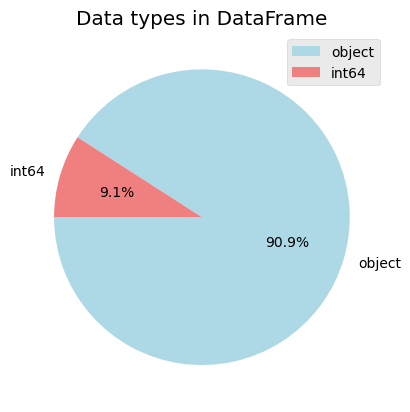

In [21]:
labels = data_types_counts.index

plt.style.use('ggplot')
plt.pie(data_types_counts,labels = labels,autopct='%1.1f%%',startangle = 180,colors = ['lightblue','lightcoral'])
plt.legend(loc='upper right')
plt.title('Data types in DataFrame')
plt.show()

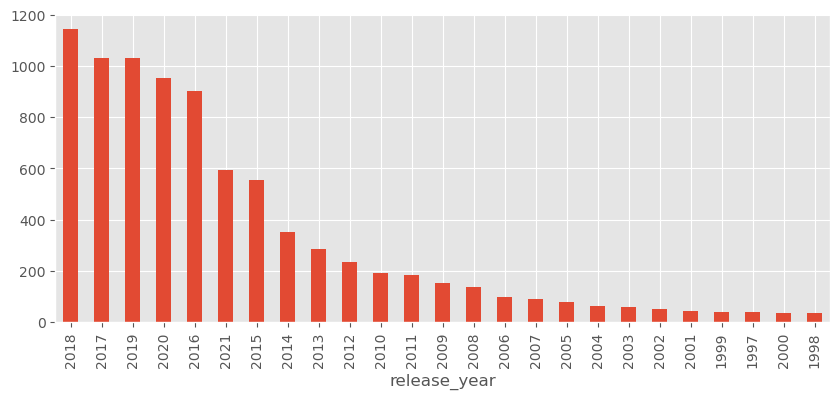

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
2003      59
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
Name: count, dtype: int64 



In [22]:
year_counts = data['release_year'].value_counts()
filtered = year_counts.head(25)

plt.figure(figsize = (10,4))
filtered.plot(kind = 'bar')
plt.show()

print(filtered,'\n')

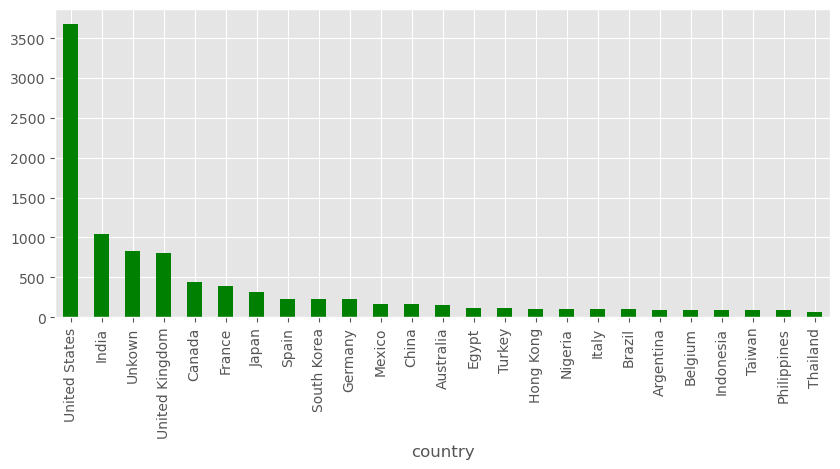

country
United States     3680
India             1046
Unkown             829
United Kingdom     803
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          158
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy               99
Brazil              97
Argentina           91
Belgium             90
Indonesia           90
Taiwan              89
Philippines         83
Thailand            70
Name: count, dtype: int64 



In [23]:
country_counts = data['country'].str.split(', ').explode().value_counts()
filtered = country_counts.head(25)
plt.figure(figsize = (10,4))
filtered.plot(kind = 'bar',color = 'green')
plt.show()
print(filtered,'\n')
# plt.hist(year_counts,x=year_counts.index)

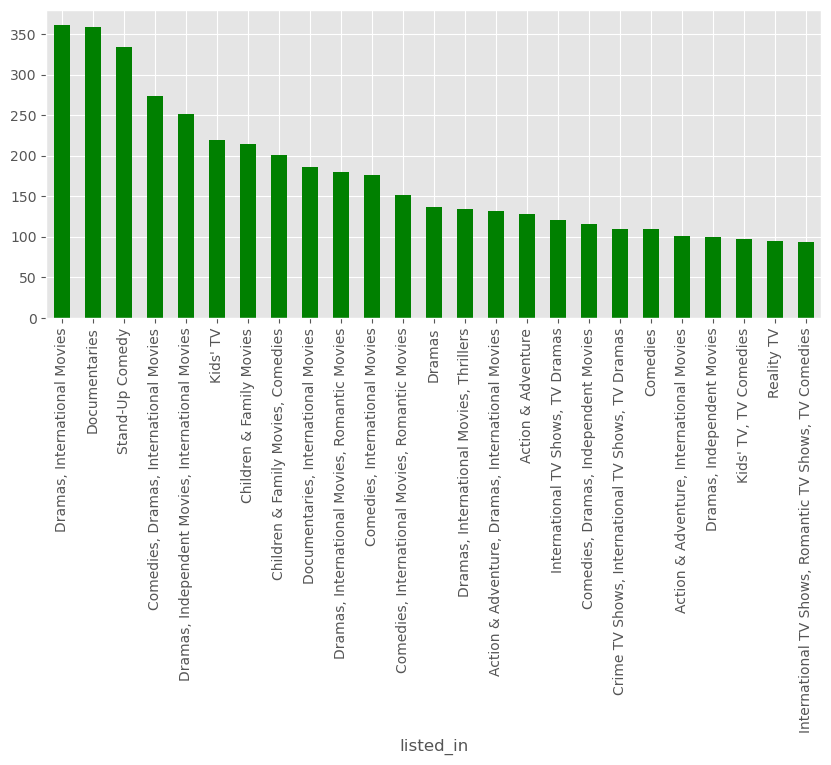

listed_in
Dramas, International Movies                              362
Documentaries                                             359
Stand-Up Comedy                                           334
Comedies, Dramas, International Movies                    274
Dramas, Independent Movies, International Movies          252
Kids' TV                                                  219
Children & Family Movies                                  215
Children & Family Movies, Comedies                        201
Documentaries, International Movies                       186
Dramas, International Movies, Romantic Movies             180
Comedies, International Movies                            176
Comedies, International Movies, Romantic Movies           152
Dramas                                                    137
Dramas, International Movies, Thrillers                   134
Action & Adventure, Dramas, International Movies          132
Action & Adventure                                        12

In [24]:
category_counts = data['listed_in'].value_counts()
filtered = category_counts.head(25)
plt.figure(figsize = (10,4))
filtered.plot(kind = 'bar',color = 'green')
plt.show()
print(filtered,'\n')
# plt.hist(year_counts,x=year_counts.index)

### seeing data distribution

In [25]:
int_col = data.select_dtypes(include = 'int').columns
str_col = data.select_dtypes(include = 'object').columns
flt_col = data.select_dtypes(include = 'float').columns

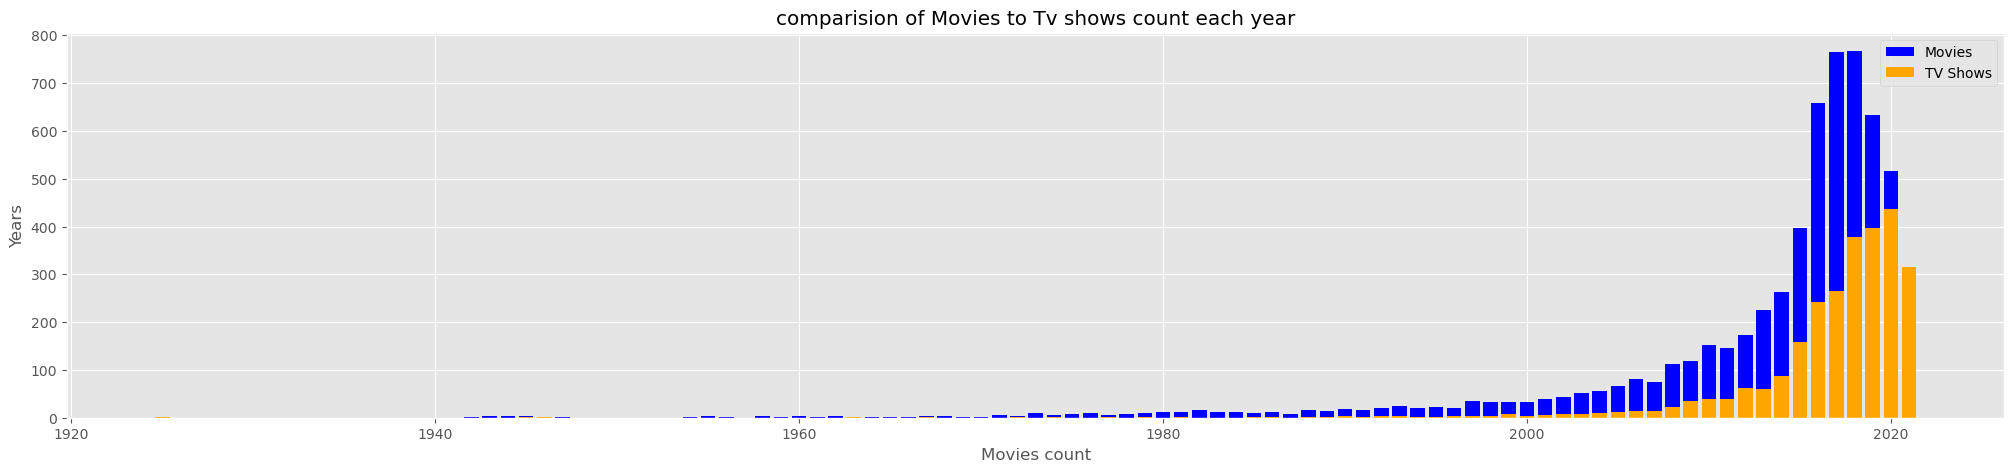

In [26]:
movie_year_counts = Movie['release_year'].value_counts()
tv_year_counts = Tv_show['release_year'].value_counts()

plt.figure(figsize = (25,5))
plt.bar(movie_year_counts.index, movie_year_counts, color='blue', label='Movies')
plt.bar(tv_year_counts.index, tv_year_counts, color='orange', label='TV Shows')
plt.ylabel('Years')
plt.xlabel('Movies count')
plt.title('comparision of Movies to Tv shows count each year')
plt.legend()
plt.show()

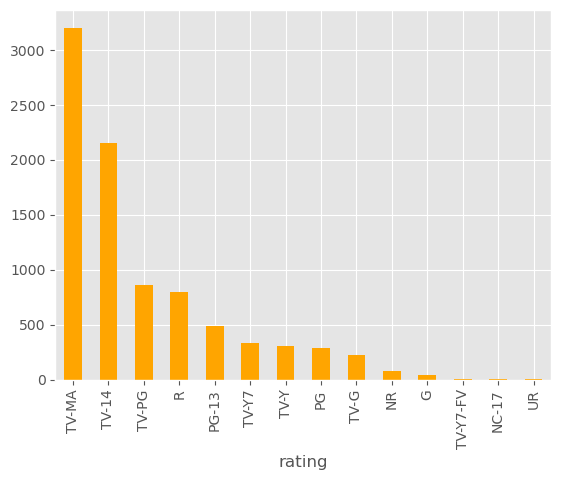

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [27]:
data['rating'].value_counts().plot(kind='bar',color = 'orange')
plt.show()
print(data['rating'].value_counts())

In [28]:
label_encoder = LabelEncoder()

for col in str_col:
    data[col] = label_encoder.fit_transform(data[col])

In [29]:
data

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1972,7233,603,1709,2020,4,210,273,2573
1,1111,1,1088,409,426,1704,2021,8,110,413,1760
2,2222,1,2646,6283,736,1704,2021,8,0,241,7324
3,3333,1,3499,7233,736,1704,2021,8,0,296,3612
4,4444,1,3853,4802,251,1704,2021,8,110,392,4409
...,...,...,...,...,...,...,...,...,...,...,...
8802,8654,0,8753,4664,603,1417,2007,5,70,268,895
8803,8655,1,8756,7233,736,786,2018,11,110,423,8466
8804,8656,0,8757,3224,603,1364,2009,5,206,206,5221
8805,8657,0,8760,7048,603,664,2006,3,206,124,3311


In [30]:
X,Y = data.drop('type',axis = 1),data['type']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 1)

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
print(f"Accuracy of {model} on the test set: {accuracy}")

Accuracy of GaussianNB() on the test set: 0.791


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
print(f"Accuracy of LogisticRegression on the test set: {accuracy}")

Accuracy of LogisticRegression on the test set: 0.8


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
print(f"Accuracy of KNN on the test set: {accuracy}")

Accuracy of KNN on the test set: 0.647


In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
print(f"Accuracy of Desision tree on the test set: {accuracy}")

Accuracy of Desision tree on the test set: 0.995


In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
print(f"Accuracy of RandomForestClassifier on the test set: {accuracy}")

Accuracy of RandomForestClassifier on the test set: 0.994


In [36]:
name = ['Naive Bayes','Logistic Regression','K nearest neighbours','Decision Tree','Random Forest']
accuracy = []
r2score = []
precision = []
roc_auc = []


#Naive Bayes
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),3))
r2score.append(round(r2_score(y_test,y_pred),3))
precision.append(round(precision_score(y_test,y_pred),3))
roc_auc.append(round(roc_auc_score(y_test,y_pred),3))


#Logistic Regression
model = LogisticRegression(max_iter = 10000)

grid = { 'C' : [1,5,10,15]}
grid_search = GridSearchCV(model, grid, scoring='roc_auc', cv=3)
best_model = grid_search.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),3))
r2score.append(round(r2_score(y_test,y_pred),3))
precision.append(round(precision_score(y_test,y_pred),3))
roc_auc.append(round(roc_auc_score(y_test,y_pred),3))


#K nearest neighbours
model = KNeighborsClassifier()

grid = { 'n_neighbors' : [3,5,7,9,11,13,15], 
        'metric':['minkowski','euclidean']}
grid_search = GridSearchCV(model, grid, scoring='roc_auc', cv=3)
best_model = grid_search.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),3))
r2score.append(round(r2_score(y_test,y_pred),3))
precision.append(round(precision_score(y_test,y_pred),3))
roc_auc.append(round(roc_auc_score(y_test,y_pred),3))


#Decision Tree classifier
model = tree.DecisionTreeClassifier()

grid = { 'criterion' : ['gini','entropy','log_loss'], 
         'min_samples_split':[1,5,10,15],
         'min_samples_leaf': [1,5,10,15]}
grid_search = GridSearchCV(model, grid, scoring='roc_auc', cv=3)
best_model = grid_search.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),3))
r2score.append(round(r2_score(y_test,y_pred),3))
precision.append(round(precision_score(y_test,y_pred),3))
roc_auc.append(round(roc_auc_score(y_test,y_pred),3))


#Random forest classifier
model = RandomForestClassifier()

grid = { 'n_estimators' : [100,150,200,250],
        'criterion' : ['gini','entropy'],
        'min_samples_split':[1,5,10],
        'min_samples_leaf': [1,5,10]}
grid_search = GridSearchCV(model, grid, scoring='roc_auc', cv=3)
best_model = grid_search.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),3))
r2score.append(round(r2_score(y_test,y_pred),3))
precision.append(round(precision_score(y_test,y_pred),3))
roc_auc.append(round(roc_auc_score(y_test,y_pred),3))

C:\Users\NITRO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NITRO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NITRO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\NITRO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\NITRO\anaconda3\Lib\site-packages

In [37]:
result = pd.DataFrame()

result['name'] = name
result['accuracy'] = accuracy
result['r2score'] = r2score
result['precision'] = precision
result['roc_auc'] = roc_auc

In [38]:
result

,name,accuracy,r2score,precision,roc_auc
0,Naive Bayes,0.791,0.032,0.654,0.772
1,Logistic Regression,0.800,0.074,0.726,0.743
2,K nearest neighbours,0.682,-0.473,0.488,0.536
3,Decision Tree,0.991,0.960,0.993,0.988
4,Random Forest,0.993,0.966,0.994,0.990


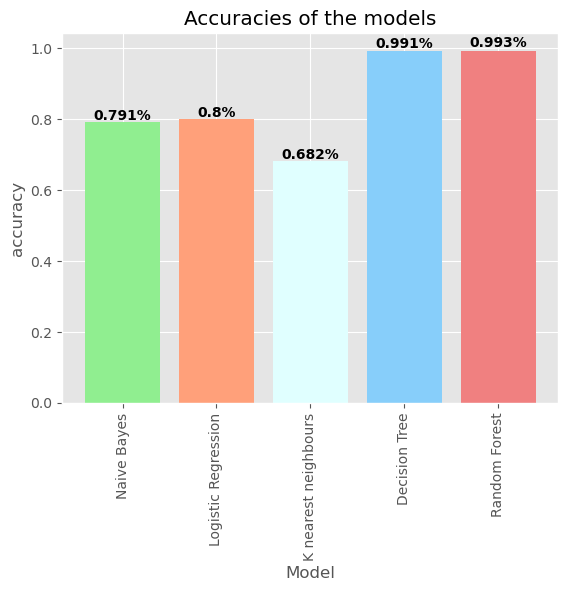

In [39]:
colors = ['lightgreen','lightsalmon','lightcyan','lightskyblue','lightcoral']
graph = plt.bar(x = result['name'],height = result['accuracy'],color = colors)
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Accuracies of the models')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(result.accuracy[i])+'%',ha='center',weight='bold')
    i += 1
plt.show()

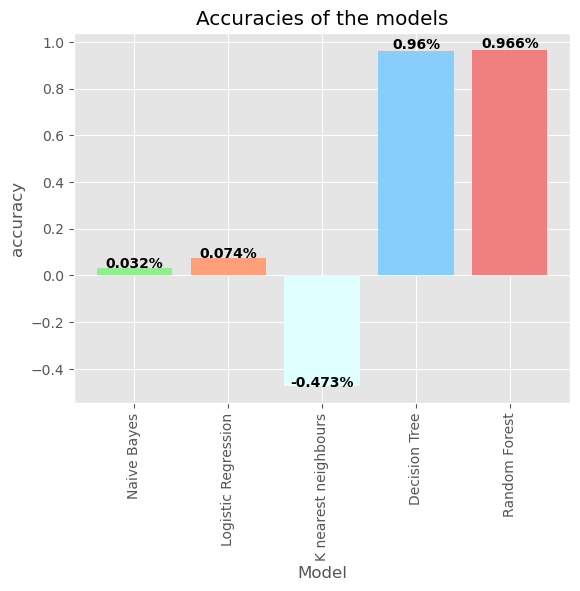

In [40]:
colors = ['lightgreen','lightsalmon','lightcyan','lightskyblue','lightcoral']
graph = plt.bar(x = result['name'],height = result['r2score'],color = colors)
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Accuracies of the models')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(result.r2score[i])+'%',ha='center',weight='bold')
    i += 1
plt.show()

1) We can clearly see that the Decision Tree classifer and Random Forest classifier have done well with 99% accuracy and coefficient of variation with 0.96 on the other side KNN was having the worst accuracy of 0.68 and have negative coefficient of variation -0.473.
2) while Naive bayes and Logistic Regression where having an accuray of 0.79 and 0.8 respectively.